In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##상관분석

In [4]:
import pandas as pd

Cancer = pd.read_csv('/content/drive/MyDrive/CancerM.csv')
Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
Cancer = Cancer.replace({'diagnosis' : 'M'}, 1)

In [9]:
Cancer = Cancer.replace({'diagnosis' : 'B'}, 0)
Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


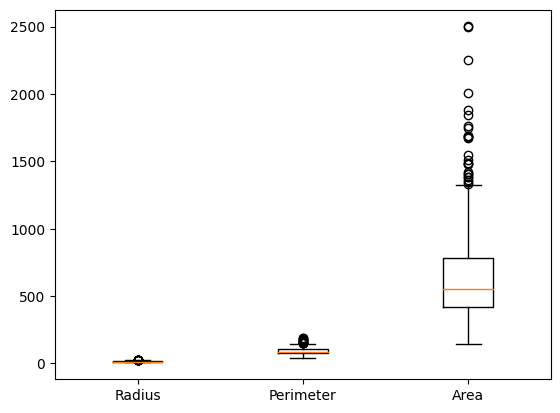

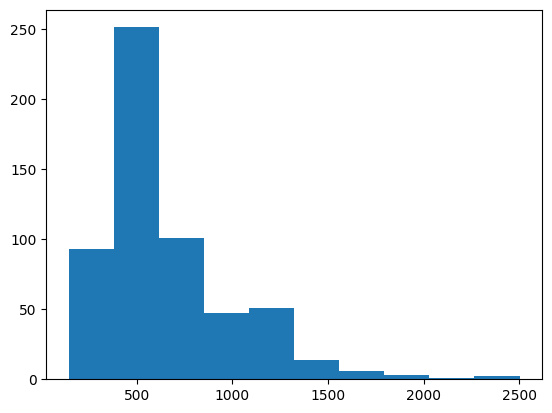

In [14]:
import matplotlib.pyplot as plt

plt.boxplot([Cancer.radius_mean, Cancer.perimeter_mean,Cancer.area_mean], labels=['Radius', 'Perimeter', 'Area'])
plt.show()
plt.hist(Cancer.area_mean)
plt.show()

#Cancer[['radius_mean','perimeter_mean','area_mean']].plot(kind='box')

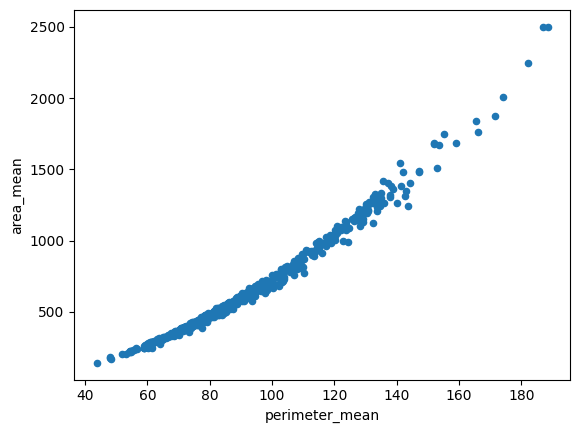

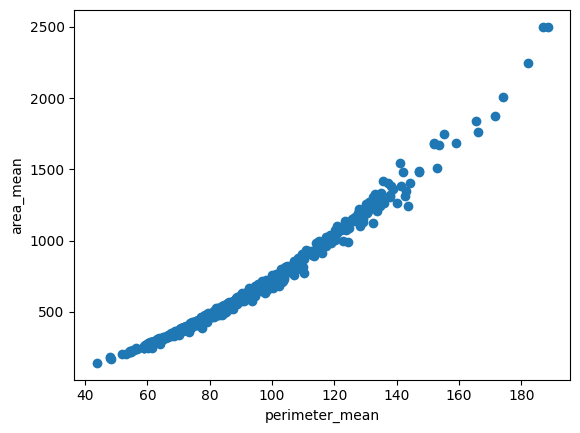

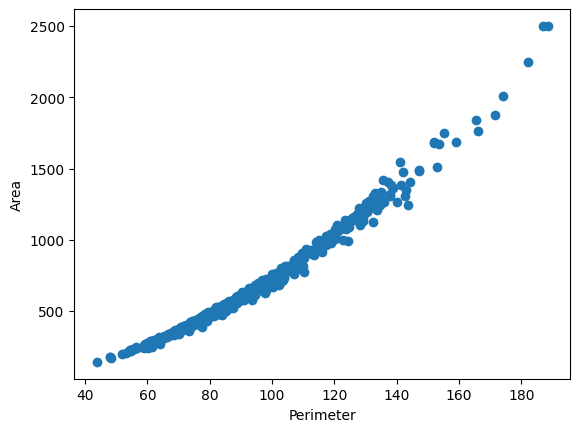

In [16]:
Cancer.plot.scatter(x='perimeter_mean', y='area_mean')
plt.show()

plt.plot('perimeter_mean', 'area_mean', 'o', data=Cancer)
plt.xlabel('perimeter_mean')
plt.ylabel('area_mean')
plt.show()

plt.scatter('perimeter_mean', 'area_mean', data=Cancer)
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.show()

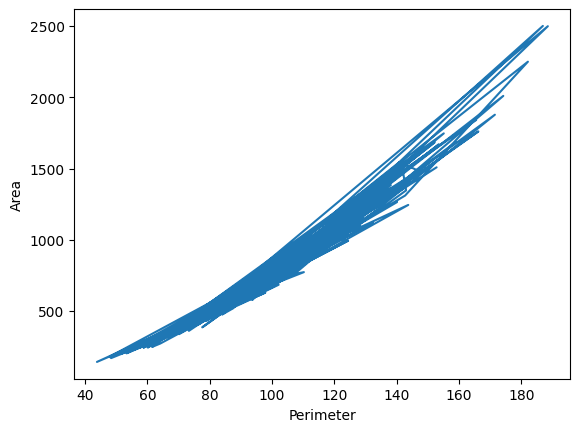

In [18]:
plt.plot('perimeter_mean', 'area_mean', data=Cancer)
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.show()

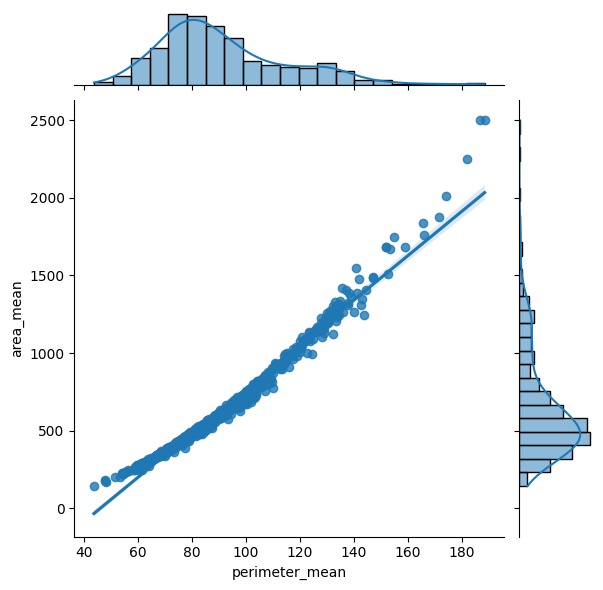

In [20]:
import seaborn as sns

sns.jointplot(x='perimeter_mean', y='area_mean', data=Cancer, kind='reg')
plt.show()

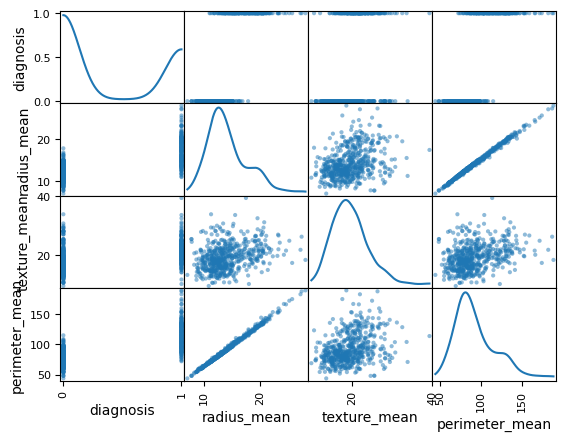

In [26]:
#산점도 행렬
from pandas.plotting import scatter_matrix
scatter_matrix(frame=Cancer.iloc[:,1:5], diagonal='kde')
plt.show()

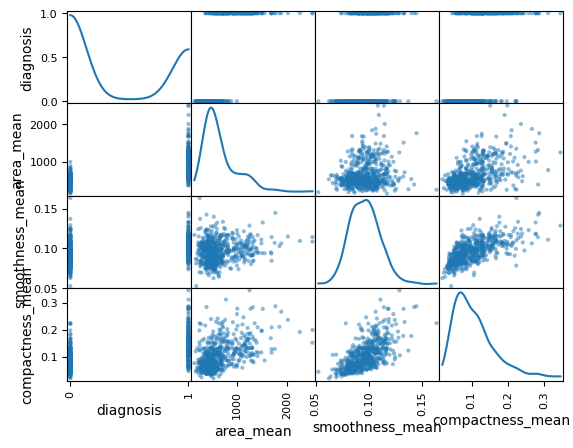

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(frame=Cancer.iloc[:,[1,5,6,7]], diagonal='kde')
plt.show()

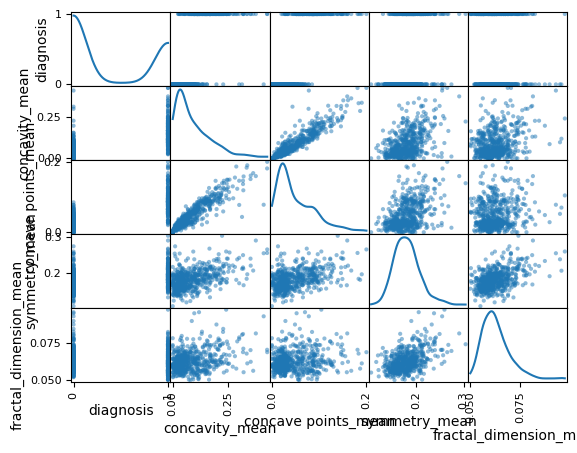

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(frame=Cancer.iloc[:,[1,8,9,10,11]], diagonal='kde')
plt.show()

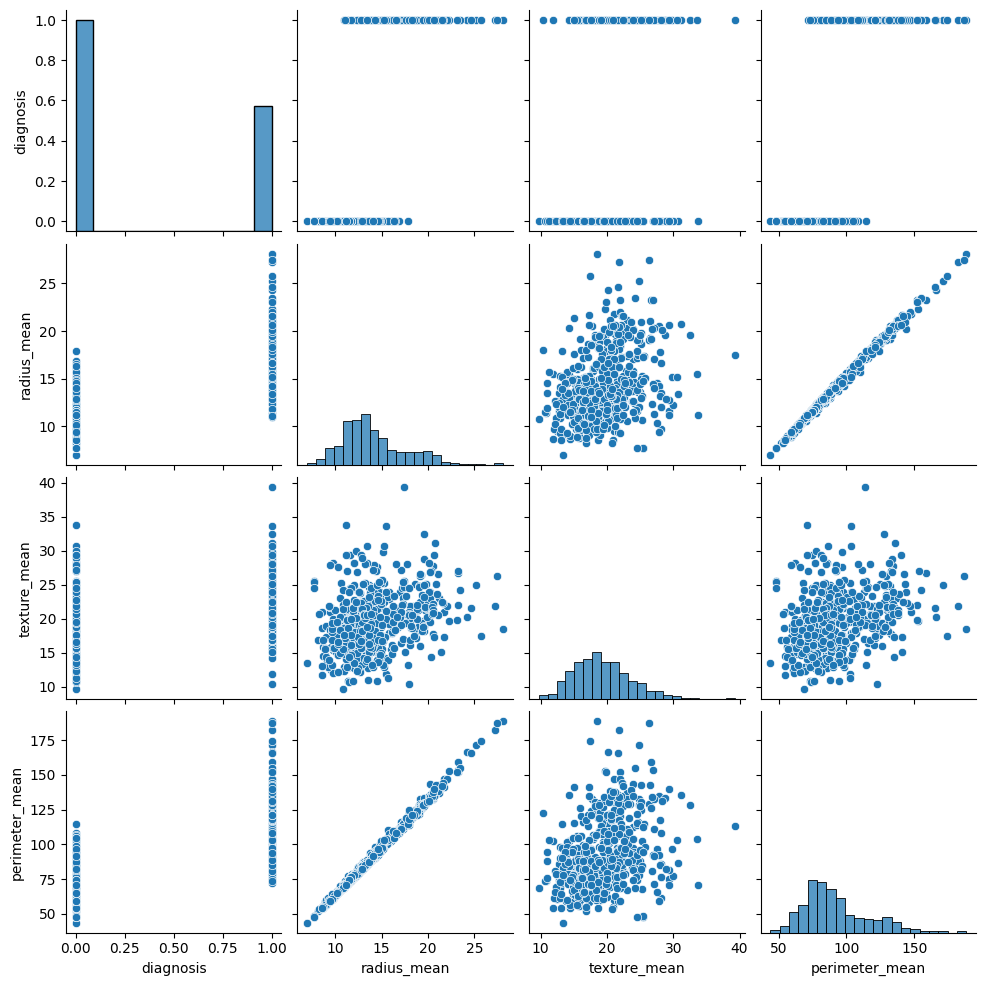

In [31]:
sns.pairplot(Cancer.iloc[:,1:5], kind='scatter', diag_kind='hist')

##2) 상관계수의 계산

In [32]:
#상관계수 검정
from scipy.stats import pearsonr, spearmanr
print(pearsonr(Cancer.diagnosis, Cancer.radius_mean))
spearmanr(Cancer.iloc[:,1:5])

PearsonRResult(statistic=0.7300285113754563, pvalue=8.46594057226424e-96)


SignificanceResult(statistic=array([[1.        , 0.73278499, 0.46197092, 0.74849601],
       [0.73278499, 1.        , 0.34095627, 0.99780174],
       [0.46197092, 0.34095627, 1.        , 0.34814189],
       [0.74849601, 0.99780174, 0.34814189, 1.        ]]), pvalue=array([[0.00000000e+000, 7.21924592e-097, 2.00048066e-031,
        3.16279512e-103],
       [7.21924592e-097, 0.00000000e+000, 5.90018960e-017,
        0.00000000e+000],
       [2.00048066e-031, 5.90018960e-017, 0.00000000e+000,
        1.17563330e-017],
       [3.16279512e-103, 0.00000000e+000, 1.17563330e-017,
        0.00000000e+000]]))

In [33]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=ed3d5d15950fcf4b688a742e1f03038a3fb3d35242c4bff8ae0a45a4a2754ae4
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [40]:
import pingouin as pg
Cancer.iloc[:,1:6].pairwise_corr().round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,diagnosis,radius_mean,pearson,two-sided,569,0.730,"[0.69, 0.77]",0.0,1.333e+92,1.0
1,diagnosis,texture_mean,pearson,two-sided,569,0.415,"[0.34, 0.48]",0.0,8.58e+21,1.0
2,diagnosis,perimeter_mean,pearson,two-sided,569,0.743,"[0.7, 0.78]",0.0,1.263e+97,1.0
3,diagnosis,area_mean,pearson,two-sided,569,0.709,"[0.67, 0.75]",0.0,2.612e+84,1.0
4,radius_mean,texture_mean,pearson,two-sided,569,0.324,"[0.25, 0.4]",0.0,2.032e+12,1.0
5,radius_mean,perimeter_mean,pearson,two-sided,569,0.998,"[1.0, 1.0]",0.0,inf,1.0
6,radius_mean,area_mean,pearson,two-sided,569,0.987,"[0.99, 0.99]",0.0,inf,1.0
7,texture_mean,perimeter_mean,pearson,two-sided,569,0.330,"[0.25, 0.4]",0.0,6.669e+12,1.0
8,texture_mean,area_mean,pearson,two-sided,569,0.321,"[0.25, 0.39]",0.0,1.175e+12,1.0
9,perimeter_mean,area_mean,pearson,two-sided,569,0.987,"[0.98, 0.99]",0.0,inf,1.0


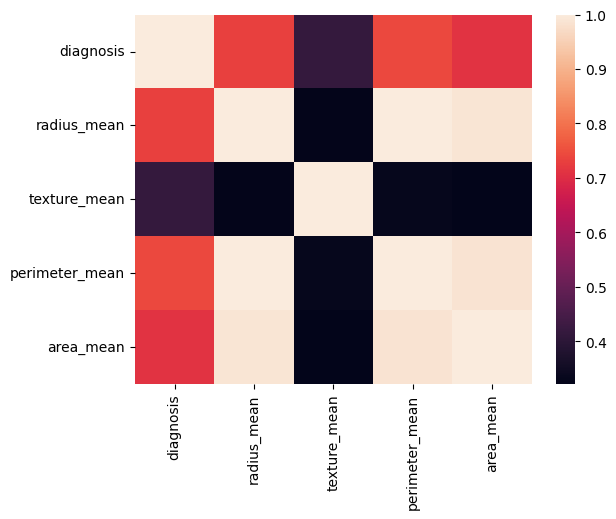

In [41]:
corr_matrix = Cancer.iloc[:,1:6].corr(method='pearson')
sns.heatmap(corr_matrix)
plt.show()

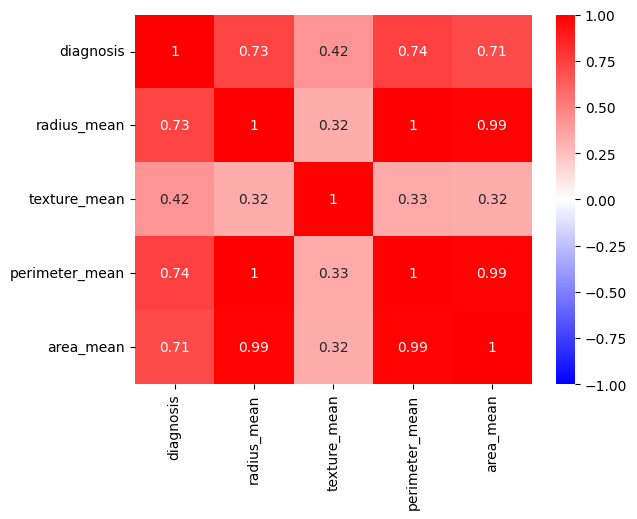

In [42]:
# annot: 값 표현 여부
# cmap: colormap
# center: cmap에서 중앙값 지정
# vmin, vmax: 출력되는 colormap의 시작과 끝

sns.heatmap(corr_matrix, annot=True, cmap='bwr', center=0, vmin=-1, vmax=1)
plt.show()

##정규화 (전처리)

In [49]:
#정규화 한 번에 하는 코드
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Cancer[ : ] = scaler.fit_transform(Cancer[ : ])

<ipython-input-49-7bd6bdf0d509>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Cancer[ : ] = scaler.fit_transform(Cancer[ : ])


In [50]:
Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


## 일원배치 분산분석

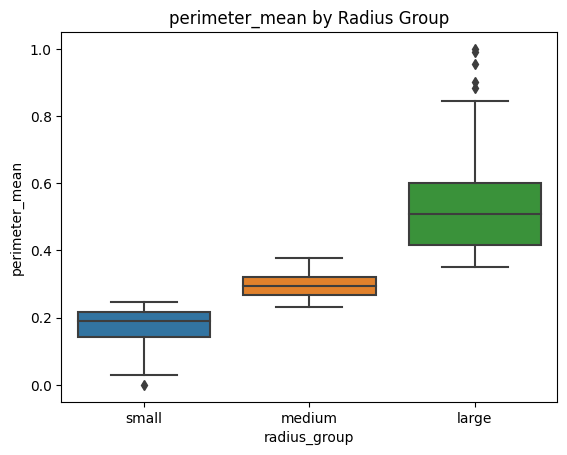

F-value:  860.6004705050732
P-value:  2.3116771222937094e-172


In [54]:
from scipy import stats
# ANOVA를 위해 세 가지 그룹으로 나눕니다.
Cancer['radius_group'] = pd.qcut(Cancer['radius_mean'], q=3, labels=["small", "medium", "large"])

# 그룹별로 데이터를 분리합니다.
group1 =Cancer[Cancer['radius_group'] == "small"]['perimeter_mean']
group2 = Cancer[Cancer['radius_group'] == "medium"]['perimeter_mean']
group3 = Cancer[Cancer['radius_group'] == "large"]['perimeter_mean']

# Boxplot으로 데이터를 시각화합니다.
sns.boxplot(x='radius_group', y='perimeter_mean', data=Cancer)
plt.title('perimeter_mean by Radius Group')
plt.show()

# ANOVA 수행
fvalue, pvalue = stats.f_oneway(group1, group2, group3)

print("F-value: ", fvalue)
print("P-value: ", pvalue)